### Задача 8.1

In [77]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [78]:
N = 100
colors = ('k', 'b', 'g', 'r', 'y')
sample = sps.norm.rvs(size=N)

Оценки взяты из задачи 8.4.

#### Модель $N (\theta, 1)$:

In [79]:
def bayes_est(i, a, s):
    return ((np.sum(sample[:i]) + a / s) / (i + 1 / s))

In [80]:
args = ((0, 1), (0, 100), (10, 1), (10, 100))

#омп
means = np.array([np.mean(sample[:i]) for i in range(1, N + 1)])

#байесовские
bayes_ests = np.zeros((len(args), N))
for i in range(0, len(args)):
    for j in range(0, N):
        bayes_ests[i][j] = bayes_est(j + 1, args[i][0], args[i][1])

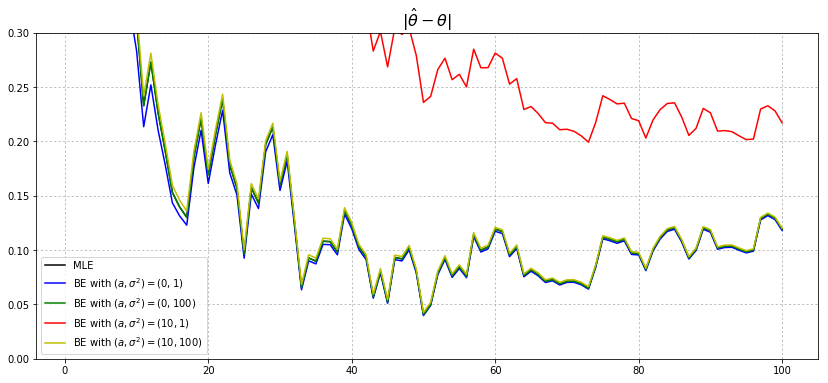

In [81]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, N + 1), np.abs(means), color=colors[0], label="MLE")
for i in  range(0, len(args)):
    plt.plot(np.arange(1, N + 1), np.abs(bayes_ests[i]), color=colors[i + 1], 
             label="BE with $(a, \sigma^2) = ({}, {})$".format(args[i][0], args[i][1]))
plt.legend(fontsize=10)
plt.title(r"$|\^\theta - \theta|$", fontsize=16)
plt.ylim(0, 0.3)
plt.grid(ls=':')
plt.show()

По сути, при маленьких $a$, больших $\sigma^2$ байесовские оценки стремятся к омп. Для $(10, 1)$ это не так - она хуже всего оценивает $\theta$.

#### Модель $N (0, \theta)$:

In [82]:
def bayes_est(i, a, b):
    return ((np.sum(square_sample[:i]) + 2 * b) / (2 * a + i - 2))

In [83]:
args = ((1, 1), (1, 100), (10, 1), (10, 100))

square_sample = np.power(sample, 2)
#омп
vars = np.array([np.var(sample[:i]) for i in range(1, N + 1)])

#байесовские
bayes_ests = np.zeros((len(args), N))
for i in range(0, len(args)):
    for j in range(0, N):
        bayes_ests[i][j] = bayes_est(j + 1, args[i][0], args[i][1])

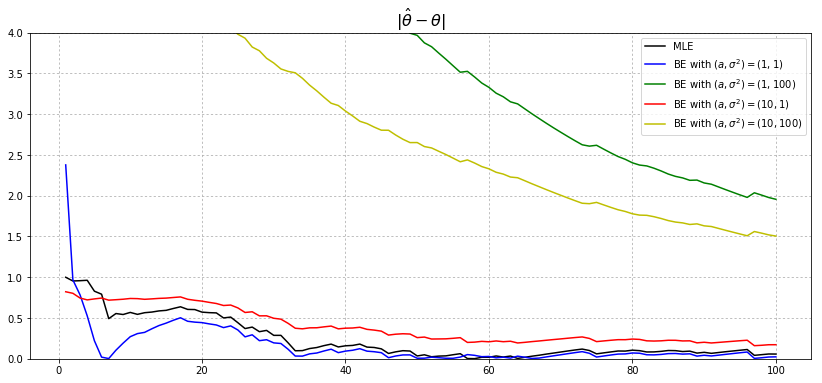

In [84]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, N + 1), np.abs(vars - 1), color=colors[0], label="MLE")
for i in  range(0, len(args)):
    plt.plot(np.arange(1, N + 1), np.abs(bayes_ests[i] - 1), color=colors[i + 1], 
             label="BE with $(a, \sigma^2) = ({}, {})$".format(args[i][0], args[i][1]))
plt.legend(fontsize=10)
plt.title(r"$|\^\theta - \theta|$", fontsize=16)
plt.ylim(0, 4.0)
plt.grid(ls=':')
plt.show()

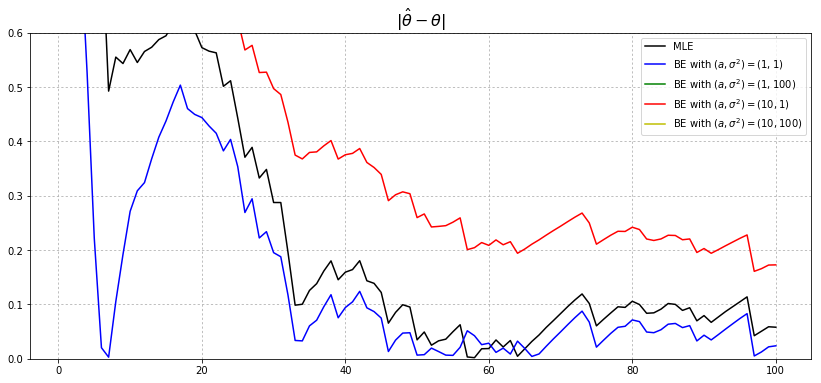

In [85]:
#то же самое в масштабе
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, N + 1), np.abs(vars - 1), color=colors[0], label="MLE")
for i in  range(0, len(args)):
    plt.plot(np.arange(1, N + 1), np.abs(bayes_ests[i] - 1), color=colors[i + 1], 
             label="BE with $(a, \sigma^2) = ({}, {})$".format(args[i][0], args[i][1]))
plt.legend(fontsize=10)
plt.title(r"$|\^\theta - \theta|$", fontsize=16)
plt.ylim(0, 0.6)
plt.grid(ls=':')
plt.show()

Получили плохую оценку $\theta$ при параметрах $(1, 100)$, $(10, 100)$ из-за очень большого второго параметра (при среднем ноль он должен стремится к нулю).

Байесовские оценки при удачно подобранных параметрах показали себя на уровне омп. Но в вычислительном плане сложнее.